# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

<h1 align=center>Exploring and Clustering Neighborhoods in Tokyo<h1/>

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data Section](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

##   1.   Introduction / Business Problem





Whether your company is an established, mature business or a start-up, locating in a **largely populated** city has several benefits. The hustle and bustle of a large metropolis seems to transfer its energy to the businesses and residents. Whether the city is located on the West Coast, the East Coast or in the Midwest, they all share several advantages which majorly includes:

**Workforce :** A big city has more workers than a small city or town. The workforce may have more varied skills as well. In addition, a big city has a variety of levels of housing from extremely affordable to extremely pricey. The variety means employees from the lowest line staffer to vice presidents will find accommodations that are comfortable and that they can afford.


**Infrastructure :** Public transportation means it's easier and less costly for employees to get to work. If travel is on the business agenda, a large city will have at least one airport with direct flights to most cities. Infrastructure includes intangibles as well, such as business networks, professional organizations and small business development centers.


**Diverse Customer Base :** Cities often have a diverse cultural base. Businesses that target a certain segment of customers will do better in a big city that has a larger population of that segment. Businesses that offer a service or product to a narrow niche will find more customers in that niche in a larger population.

**In this project we will try to find an optimal location for  Grocery stores. Specifically, this report will be targeted to stakeholders interested in opening  Grocery stores in Tokyo, Japan.** 


<P style =color:red;>Since Grocery Stores are often cited as among the types of businesses with the lowest profit margins. It's true. Grocery store profit margins typically range from 1 percent to 3 percent, depending on the items. Grocery stores make their money on volume. They may not make much on any one item, that's why the store kindly provides big shopping carts for their customers. With not much additional effort, the grocery store sells you 20 items or more, making much more profit than they would have if you had bought only one item. Given This, we will employ our skills as a data scientist to identify highly populated neigborhood where competition are bound to be very minimal.<p/>


<P style =color:red;>We will use our data science powers to generate a few most promissing neighborhoods based on this criteria. Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.<p/>





# 2.  Data Section

Based on definition of our problem, factors that will influence our decission are:
* number of existing Borughs/Wards and their Major neighborhoods.
* number of  inhabitants of each Wards that forms the neighborhood.
* Most Common venues in Those neighborhood to give us an insight to the degree of Competiition if any.

We decided to use regularly spaced grid of locations, centered around Wards, to define our neighborhoods.

Following data sources will be needed to extract/generate the required information:
* centers of candidate areas will be generated algorithmically and approximate addresses of centers of those areas will be obtained using **Google Maps API reverse geocoding**
*Common Venues and Exploratioon of the neighborhood will be obtained using **Foursquare API**
* coordinate of Neighborhoods selected based on some criteria will be clusteterd to highlight Similarities and Provide Better Understanding of the Neighborhoods.

## installing and importing Necessary libraries

In [2]:
!conda install -c conda-forge bs4 --yes


Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - bs4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.9.1       |   py36h9f0ad1d_0         163 KB  conda-forge
    bs4-4.9.1                  |                0           4 KB  conda-forge
    soupsieve-2.0.1            |   py36h9f0ad1d_0          56 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         223 KB

The following NEW packages will be INSTALLED:

  beautifulsoup4     conda-forge/linux-64::beautifulsoup4-4.9.1-py36h9f0ad1d_0
  bs4                conda-forge/noarch::bs4-4.9.1-0
  soupsieve          conda-forge/linux-64::soupsieve-2.0.1-py36h9f0ad1d_0



beautifulsoup4-4.9.1 | 163 KB    | ##################################### | 100% 
bs4-4.9.1 

In [3]:
import requests
import numpy as np
import pandas as pd # library for data analsysis
from pandas import Series, DataFrame
from bs4 import BeautifulSoup
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge folium --yes
import geopy
import folium



Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

## Scraping the wards and neighborhoods in Tokyo

In [4]:
url = 'https://en.wikipedia.org/wiki/Special_wards_of_Tokyo'
requests.get(url).text
file = BeautifulSoup(requests.get(url).text, 'html.parser')
Table = file.find('table', class_='wikitable sortable')
#Table

#### Creating a Data Frame to Store The Tokyo Data

In [5]:
df = DataFrame(columns=['no','flag','Wards','kanji','population','Den','Area','Neighborhood'])
df

,no,flag,Wards,kanji,population,Den,Area,Neighborhood


#### Looping through the Scraped html web data to fill the the created Dataframe

In [6]:
for table_row in Table.find_all('tr'):
 row_inputs = []
 for row_data in table_row.find_all('td'):
     row_inputs.append(row_data.text.strip())
 if len(row_inputs)==8:
    df.loc[len(df)] = row_inputs    
df.shape


(23, 8)

##### The DataFrame consist of 23 rows representing the 23 wards in tokyo and 8 columns 

In [7]:
df.head()


,no,flag,Wards,kanji,population,Den,Area,Neighborhood
0,01,,Chiyoda,千代田区,"0059,441","05,100",011.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,..."
1,02,,Chūō,中央区,"0147,620","14,460",010.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb..."
2,03,,Minato,港区,"0248,071","12,180",020.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong..."
3,04,,Shinjuku,新宿区,"0339,211","18,620",018.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich..."
4,05,,Bunkyō,文京区,"0223,389","19,790",011.29,"Hongō, Yayoi, Hakusan"


### Data Processing

#### drop unecessary columns

In [8]:
df = df.drop(columns=['no','flag','kanji','Den','Area'])
df.head()


,Wards,population,Neighborhood
0,Chiyoda,"0059,441","Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,..."
1,Chūō,"0147,620","Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb..."
2,Minato,"0248,071","Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong..."
3,Shinjuku,"0339,211","Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich..."
4,Bunkyō,"0223,389","Hongō, Yayoi, Hakusan"


#### finding the co-ordinates of the 23 wards

In [9]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='Tokyo_Explorer')
df['ward_Coord'] = df['Wards'].apply(geolocator.geocode).apply(lambda x:(x.latitude, x.longitude))
df.head()


,Wards,population,Neighborhood,ward_Coord
0,Chiyoda,"0059,441","Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...","(35.6938097, 139.7532163)"
1,Chūō,"0147,620","Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb...","(35.666255, 139.775565)"
2,Minato,"0248,071","Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...","(35.6432274, 139.7400553)"
3,Shinjuku,"0339,211","Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich...","(35.6937632, 139.7036319)"
4,Bunkyō,"0223,389","Hongō, Yayoi, Hakusan","(35.71881, 139.744732)"


In [10]:
#convert the series to type str
df['ward_Coord'] = df['ward_Coord'].astype(str)
# Create two lists for the loop results to be placed
lat = []
lon = []

# For each row in a varible,
for row in df['ward_Coord']:
    # Try to,
    try:
        # Split the row by comma and append
        # everything before the comma to lat
        lat.append(row.split(',')[0])
        # Split the row by comma and append
        # everything after the comma to lon
        lon.append(row.split(',')[1])
    # But if you get an error
    except:
        # append a missing value to lat
        lat.append(np.NaN)
        # append a missing value to lon
        lon.append(np.NaN)

# Create two new columns from lat and lon
df['latitude'] = lat
df['longitude'] = lon

In [11]:
df['latitude'] =df['latitude'].str.replace("(","")
df['longitude'] =df['longitude'].str.replace(")","") 
df = df.drop(columns=['ward_Coord'])
df.head()

,Wards,population,Neighborhood,latitude,longitude
0,Chiyoda,"0059,441","Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",35.6938097,139.7532163
1,Chūō,"0147,620","Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb...",35.666255,139.775565
2,Minato,"0248,071","Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",35.6432274,139.7400553
3,Shinjuku,"0339,211","Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich...",35.6937632,139.7036319
4,Bunkyō,"0223,389","Hongō, Yayoi, Hakusan",35.71881,139.744732


# 3.  Methodology

In this project we will direct our efforts on Identifying areas of Tokyo that have a a high poulation density.

In the first step we have collected the required **data**, processed the collected data and obtained the coordinates of the 23 special wards in tokyo using Google Maps API reverse geocoding

Second step in our analysis will make use of folium to visualize and explore Tokyo as well as the wards where Our clients will be siting his Grocery stores. The  map will also be used in exploration of '**Population density** of Major areas of Tokyo. 

In third and final step we will focus on most promising areas and within these areas create **clusters of locations that meet some basic requirements** established in discussion with stakeholders: we will take into consideration The most populated locations as promising areas for a Grocery Business to florish. 

Futhermore, we shall employ the FourSquare API to explore these densely populated areas. This areas will be Anayzed to further obtain the  5 most common venues.

Finally, we will further Analyze these Neighborhoods and ceate clusters (using **k-means clustering**) of those locations to identify general zones / neighborhoods / addresses which should be a starting point for final exploration and search for optimal venue locations by stakeholders.

## 3.1.  Analysis

In [12]:

import json # library to handle JSON files
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans



print('Libraries imported.')

Libraries imported.


### Use geopy library to get the latitude and longitude values of TOKYO

#### In order to define an instance of the geocoder, we need to define a user_agent  


In [13]:
address = 'TOKYO'

geolocator = Nominatim(user_agent="Tokyo_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Tokyo are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Tokyo are 35.6828387, 139.7594549.


#### create map of Tokyo showing each wards and how populated they are using latitude and longitude values


In [14]:

# create map of Tokyo using latitude and longitude values
tokyo = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, wards, pop, neighborhood in zip(df['latitude'], df['longitude'], df['Wards'], df['population'], df['Neighborhood']):
    label = '{}, {}'.format(wards, pop)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(tokyo)  
    
tokyo

## selecting the top 5 populated cities

In [48]:
df = df.sort_values(by ='population', ascending = False)
df = df.reset_index(drop=True)
df2 = df.head()
df2

,Wards,population,Neighborhood,latitude,longitude
0,Setagaya,"0910,868","Setagaya, Shimokitazawa, Kinuta, Karasuyama, T...",35.646096,139.65627
1,Nerima,"0726,748","Nerima, Ōizumi, Hikarigaoka",35.74836,139.638735
2,OtaŌta,"0722,608","Ōmori, Kamata, Haneda, Den-en-chōfu",-36.9673561,174.9407229
3,Edogawa,"0685,899","Kasai, Koiwa",35.678278,139.871091
4,Adachi,"0674,067","Ayase, Kitasenju, Takenotsuka",35.783703,139.795319


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


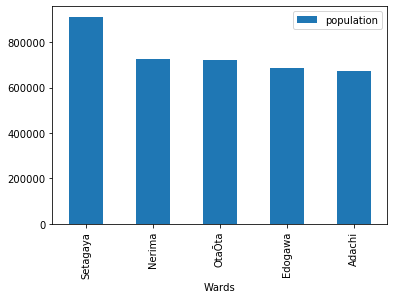

In [49]:
x = df2[['Wards','population']]
x['population']=x['population'].str.replace(",","").astype(str).astype(int)
x= x.set_index('Wards')
x.plot(kind='bar')

### defining my foursquare credentials

In [23]:
CLIENT_ID = '2IW35JEHROS4UOWMJQJUNFE5Y4IWYIBERQSNIDKQSBNAHAC3' # your Foursquare ID
CLIENT_SECRET = 'SZBI4KNZETCPDD3BDHWX4P0ZIFKYX3KJQCLX0WM11HSURGMI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = '200'


print('LIMIT:' + LIMIT )
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


LIMIT:200
Your credentails:
CLIENT_ID: 2IW35JEHROS4UOWMJQJUNFE5Y4IWYIBERQSNIDKQSBNAHAC3
CLIENT_SECRET:SZBI4KNZETCPDD3BDHWX4P0ZIFKYX3KJQCLX0WM11HSURGMI


## Exploring venues in tokyo 5 most populated wards

#### now lets create a function that extracts nearby venues

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

##### Now write the code to run the above function on each neighborhood and create a new dataframe called tokyo_ven.

In [25]:
tokyo_ven = getNearbyVenues(names=df2['Neighborhood'],
                                   latitudes=df2['latitude'],
                                   longitudes=df2['longitude']
                                  )

Setagaya, Shimokitazawa, Kinuta, Karasuyama, Tamagawa
Nerima, Ōizumi, Hikarigaoka
Ōmori, Kamata, Haneda, Den-en-chōfu
Kasai, Koiwa
Ayase, Kitasenju, Takenotsuka


In [20]:
#Let's check the size of the resulting dataframe and the first five rows
print(tokyo_ven.shape)
tokyo_ven.head()

(85, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Setagaya, Shimokitazawa, Kinuta, Karasuyama, T...",35.646096,139.65627,Asahiya Parlor (旭屋パーラー),35.645966,139.656110,Tea Room
1,"Setagaya, Shimokitazawa, Kinuta, Karasuyama, T...",35.646096,139.65627,Boulangerie Sudo (ブーランジェリー スドウ),35.643927,139.655058,Bakery
2,"Setagaya, Shimokitazawa, Kinuta, Karasuyama, T...",35.646096,139.65627,松波ラーメン店,35.644012,139.655817,Ramen Restaurant
3,"Setagaya, Shimokitazawa, Kinuta, Karasuyama, T...",35.646096,139.65627,シチューのお店 ヒポポタマス,35.644480,139.655650,Diner
4,"Setagaya, Shimokitazawa, Kinuta, Karasuyama, T...",35.646096,139.65627,MERCI BAKE (メルシーベイク),35.643533,139.655419,Cupcake Shop


In [63]:
#Let's check how many venues were returned for each neighborhood
tokyo_ven.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Ayase, Kitasenju, Takenotsuka",13,13,13,13,13,13
"Kasai, Koiwa",16,16,16,16,16,16
"Nerima, Ōizumi, Hikarigaoka",22,22,22,22,22,22
"Setagaya, Shimokitazawa, Kinuta, Karasuyama, Tamagawa",39,39,39,39,39,39


,Venue Category
Neighborhood,
"Ayase, Kitasenju, Takenotsuka",13
"Kasai, Koiwa",16
"Nerima, Ōizumi, Hikarigaoka",22
"Setagaya, Shimokitazawa, Kinuta, Karasuyama, Tamagawa",39


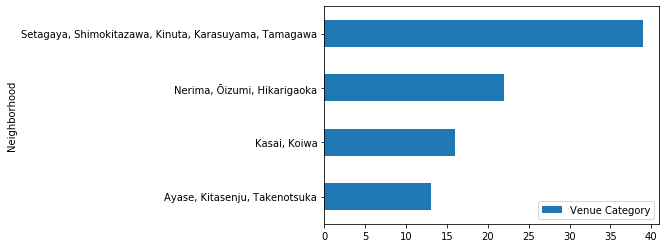

In [64]:
y = tokyo_ven.groupby('Neighborhood').count().reset_index()
y = y[['Neighborhood','Venue Category']]
y['Venue Category'].astype(str).astype(int)
y = y.set_index('Neighborhood')
y.plot(kind='barh')
y

### ANALYZING EACH NEIGHBORHOOD IN TOKYO'S MOST  POPULATED NEIIGHBORHOODS

In [26]:
# one hot encoding
tok_onehot = pd.get_dummies(tokyo_ven[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
tok_onehot['Neighborhood'] = tokyo_ven['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [tok_onehot.columns[-1]] + list(tok_onehot.columns[:-1])
tok_onehot = tok_onehot[fixed_columns]

tok_onehot.head()

,Neighborhood,BBQ Joint,Bakery,Bar,Bath House,Beer Bar,Bike Rental / Bike Share,Bistro,Bridge,Bus Stop,...,Restaurant,Road,Sake Bar,Supermarket,Szechuan Restaurant,Tea Room,Tram Station,Tunnel,Unagi Restaurant,Used Bookstore
0,"Setagaya, Shimokitazawa, Kinuta, Karasuyama, T...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,"Setagaya, Shimokitazawa, Kinuta, Karasuyama, T...",0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Setagaya, Shimokitazawa, Kinuta, Karasuyama, T...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Setagaya, Shimokitazawa, Kinuta, Karasuyama, T...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Setagaya, Shimokitazawa, Kinuta, Karasuyama, T...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [27]:
tok_grouped = tok_onehot.groupby('Neighborhood').mean().reset_index()
#TORONTO_grouped

print(tok_grouped.shape)
#tok_grouped.head()

(4, 46)


### Let's print each neighborhood along with the top 5 most common venues

In [28]:
num_top_venues = 5

for hood in tok_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = tok_grouped[tok_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ayase, Kitasenju, Takenotsuka----
                 venue  freq
0    Convenience Store  0.23
1            Drugstore  0.15
2  Japanese Restaurant  0.08
3                 Park  0.08
4          Supermarket  0.08


----Kasai, Koiwa----
                venue  freq
0   Convenience Store  0.31
1       Grocery Store  0.12
2       Deli / Bodega  0.06
3  Italian Restaurant  0.06
4          Bath House  0.06


----Nerima, Ōizumi, Hikarigaoka----
                venue  freq
0   Convenience Store  0.18
1                Café  0.09
2        Intersection  0.09
3  Chinese Restaurant  0.05
4      Discount Store  0.05


----Setagaya, Shimokitazawa, Kinuta, Karasuyama, Tamagawa----
               venue  freq
0  Convenience Store  0.18
1               Café  0.08
2         Restaurant  0.05
3   Ramen Restaurant  0.05
4             Bakery  0.05




### Let's put that into a pandas dataframe
#### First, let's write a function to sort the venues in descending order.

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

 ### Now let's create the new dataframe and display the top 10 venues for each neighborhood

In [30]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = tok_grouped['Neighborhood']

for ind in np.arange(tok_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(tok_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Ayase, Kitasenju, Takenotsuka",Convenience Store,Drugstore,Park,Restaurant,Italian Restaurant,Japanese Restaurant,Pharmacy,Discount Store,Supermarket,Sake Bar
1,"Kasai, Koiwa",Convenience Store,Grocery Store,Bakery,Bath House,Supermarket,Italian Restaurant,Bridge,Ramen Restaurant,Deli / Bodega,Clothing Store
2,"Nerima, Ōizumi, Hikarigaoka",Convenience Store,Intersection,Café,BBQ Joint,Bus Stop,Historic Site,Karaoke Box,Metro Station,Chinese Restaurant,Discount Store
3,"Setagaya, Shimokitazawa, Kinuta, Karasuyama, T...",Convenience Store,Café,Bakery,Tram Station,Restaurant,Ramen Restaurant,Used Bookstore,Fast Food Restaurant,Drugstore,Diner


# Clustering Neighborhoods in Tokyo's 5 Most populated Wards


### Run k-means to cluster the neighborhood into 3 clusters

In [31]:
kclusters = 3

tok_grouped_clustering = tok_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tok_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 1, 1], dtype=int32)

### Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [32]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Dataframe_MERGED = df2

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Dataframe_MERGED = Dataframe_MERGED.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Dataframe_MERGED.head() # check the last columns!

,Wards,population,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Setagaya,"0910,868","Setagaya, Shimokitazawa, Kinuta, Karasuyama, T...",35.646096,139.65627,1.0,Convenience Store,Café,Bakery,Tram Station,Restaurant,Ramen Restaurant,Used Bookstore,Fast Food Restaurant,Drugstore,Diner
1,Nerima,"0726,748","Nerima, Ōizumi, Hikarigaoka",35.74836,139.638735,1.0,Convenience Store,Intersection,Café,BBQ Joint,Bus Stop,Historic Site,Karaoke Box,Metro Station,Chinese Restaurant,Discount Store
2,OtaŌta,"0722,608","Ōmori, Kamata, Haneda, Den-en-chōfu",-36.9673561,174.9407229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Edogawa,"0685,899","Kasai, Koiwa",35.678278,139.871091,2.0,Convenience Store,Grocery Store,Bakery,Bath House,Supermarket,Italian Restaurant,Bridge,Ramen Restaurant,Deli / Bodega,Clothing Store
4,Adachi,"0674,067","Ayase, Kitasenju, Takenotsuka",35.783703,139.795319,0.0,Convenience Store,Drugstore,Park,Restaurant,Italian Restaurant,Japanese Restaurant,Pharmacy,Discount Store,Supermarket,Sake Bar


## Finally Lets Visualize Our Clusters

In [33]:
#MAP HERE
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Dataframe_MERGED['latitude'], Dataframe_MERGED['longitude'], Dataframe_MERGED['Neighborhood'], Dataframe_MERGED['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        #color=rainbow,
        fill=True,
        #fill_color=rainbow,
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Lets see the individual clusters

In [34]:
Dataframe_MERGED.loc[Dataframe_MERGED['Cluster Labels'] == 0, Dataframe_MERGED.columns[[1] + list(range(5, Dataframe_MERGED.shape[1]))]]

,population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,"0674,067",0.0,Convenience Store,Drugstore,Park,Restaurant,Italian Restaurant,Japanese Restaurant,Pharmacy,Discount Store,Supermarket,Sake Bar


In [35]:
Dataframe_MERGED.loc[Dataframe_MERGED['Cluster Labels'] == 1, Dataframe_MERGED.columns[[1] + list(range(5, Dataframe_MERGED.shape[1]))]]

,population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"0910,868",1.0,Convenience Store,Café,Bakery,Tram Station,Restaurant,Ramen Restaurant,Used Bookstore,Fast Food Restaurant,Drugstore,Diner
1,"0726,748",1.0,Convenience Store,Intersection,Café,BBQ Joint,Bus Stop,Historic Site,Karaoke Box,Metro Station,Chinese Restaurant,Discount Store


In [36]:
Dataframe_MERGED.loc[Dataframe_MERGED['Cluster Labels'] == 2, Dataframe_MERGED.columns[[1] + list(range(5, Dataframe_MERGED.shape[1]))]]

,population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,"0685,899",2.0,Convenience Store,Grocery Store,Bakery,Bath House,Supermarket,Italian Restaurant,Bridge,Ramen Restaurant,Deli / Bodega,Clothing Store


# 4.   Results  Section

We reached the end of the Analysis where we have identified and explored Venues in the most poulated areas of tokyo as stated in the business requirements.  i have used Data from web sources like Wikipedia,Python, Geopy and Foursquare API, and below are the summary of the results obtained

* Setagaya, Nerima, OtaŌta, Edogawa, Edogawa and Adachi  was identified as the most populated wards in tokyo with a total population of       910868, 726748, 722608, 685899 and 674067 Respectively.

* Setagaya toped the list comprising of 4 Major Districts which includes Shimokitazawa, Kinuta, Karasuyama, Tamagawa.



* Using Foursquare API to explore these populated wards, a total of 18 Neighborhoods were returned, which were to be considered favourable   foor establishing a Grocery Business. These Neigborhood was Analyzed and a total  of 84 venue categories were identiified of which the     Setagaya Ward alone had a maximum of 38 venue categories.




****Exploring the 5 most common Venues in Each ward and its Major district, we found that for Neighborhoods like****

 * **Ayase, Kitasenju, Takenotsuka (Adachi Ward)**: Venues identified in order of their frequencies are Convienience store, Drug Store,          Japanese Restaurant, Park and Supermarkets.


 * **Kasai, Koiwa (Edogawa Ward):** Venues identified in order of their frequencies are Convienience Store, Grocery store, Deli, Italian         Restaurant and Bath house.


 * **3.Nerima, Ōizumi, Hikarigaoka (Nerima Ward):** Venues identified in order of their frequencies are majorly Convienience Store, Cafe          and Chinese Restaurant.


 * **4.Setagaya, Shimokitazawa, Kinuta, Karasuyama, Tamagawa(Setagaya Ward):** Venues identified in order of their frequencies are majorly        Convienience Store, Cafe, Restaurants and Bakery.



**Finally,** These Wards were seperated into 3 clustered with k=means clustering yielding the bekow outcomes:

* **Cluster 1** : Adachi 

* **Cluster 2** : Setagaya, Nerima

* **Cluster 3** :  Edogawa

# 5.   Discussion and Recommendation

<p style =color:green;><strong>Accoording to the Result of the Analysis SETAGAYA and NERIMA<strong/> are ideal to provide The Largest prospective customer Base to ensure a better profitability ratio, the work force required to operate large Grocery Stores and  Accomodation that suites the different cadres of the employees owing to its large population Density when compared to other wards.<P/>

    
<p style=color:green> Furthermore, Since these areas also do not feature Grocery stores/Supermarket even at its 10 most common venues, the area will  provide the least competition for an upcoming Grocery store. In addition it can be observed that common venues in the area are Convienience Store, restaurants, cafe, and Bakery which from intuition will appreciate the Establishment of Nearby Grocery store from which they can procure their Necessary Raw Materials, facilitiies and equipments required for Daily use. This will help curtail Transportion expense incurred on purchasing the above enumerated items from a farther Distance.<p/>




# 6.   Conclusion

Purpose of this project was to identify ideal, Populated and less competitive areas in Tokyo in order to aid stakeholders in narrowing down the search for optimal location for a Establishment of Grocery stores. By Exploring Populated Wards and Neighborhoods and Analyzing  most common venues from Foursquare data we have first identified general Wards that justify further analysis (Setagaya, Nerima, OtaŌta, Edogawa, Edogawa and Adachi), and then generated extensive collection of Neighborhood and venues  which satisfy some basic requirements regarding establishment of Grocery stores. Clustering of those locations was then performed in order to create major zones of interest (containing greatest number of potential locations) and addresses of those zone centers were created to be used as starting points for final exploration by stakeholders.


  Final decision on optimal business locations will be made by stakeholders based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like attractiveness of each location (proximity to park or water), Availability of other commercial businesses, Convenience stores, Refreshment and recreational centres, Accomodation cost and  availability, Prices, Social and economic dynamics of every neighborhood etc.